In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [63]:
data = pd.read_csv('6.2 knn_example2.csv')

In [64]:
data.head(2)

,x1,x2,class
0,1.958200,1.701914,0
1,2.190759,1.379214,0


(array([100.,   0.,   0., 100.,   0.,   0., 100.,   0.,   0., 100.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

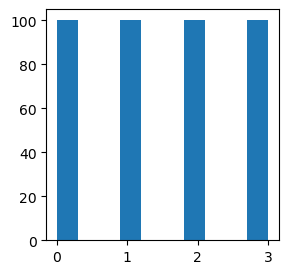

In [65]:
plt.figure(figsize=(3,3))
plt.hist(data['class'])

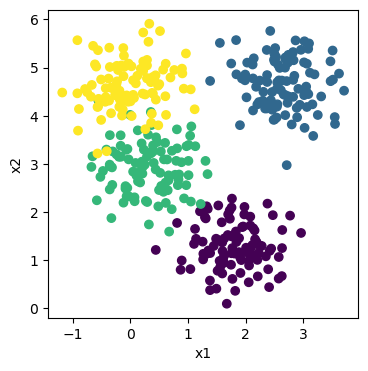

In [66]:
plt.figure(figsize=(4,4))
plt.scatter(data['x1'], data['x2'], c=data['class'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [67]:
import plotly
import plotly.express as px

In [68]:
#fig = 
#plotly.plot(data, x=data['x1'], y=data['x2'], kind='line')
px.line(data, x=data['x1'], y=data['x2'])
#fig.show()

In [69]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, train_size=0.7, random_state=123)

In [70]:
X_train = data_train[['x1', 'x2']]
y_train = data_train[['class']]

X_test = data_test[['x1', 'x2']]
y_test = data_test[['class']]

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [72]:
knn = KNeighborsClassifier(n_neighbors=3)

In [73]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [74]:
print('Прогнозы для обучающей выборки:', knn.predict(X_train))

Прогнозы для обучающей выборки: [1 1 0 2 0 0 0 0 3 1 1 3 0 0 2 3 0 1 0 0 0 3 2 3 0 3 3 3 3 3 1 0 1 3 1 1 3
 1 0 1 1 2 2 3 1 0 1 1 0 3 2 0 1 3 0 3 3 3 2 2 1 1 3 0 2 1 3 2 3 1 3 2 2 1
 2 2 2 0 0 0 3 0 2 3 2 0 0 0 2 3 1 2 1 1 1 2 2 1 0 1 1 3 3 3 3 2 0 3 3 2 1
 3 3 3 1 1 3 1 2 1 1 2 0 3 3 1 0 2 3 2 1 1 2 3 1 1 0 3 1 0 0 1 2 2 2 3 3 0
 2 1 2 3 2 2 3 3 1 3 0 3 3 0 2 0 0 2 2 1 1 0 3 2 0 2 3 0 0 1 1 0 1 3 1 2 0
 1 1 0 0 2 2 2 2 2 3 1 1 1 0 0 0 3 2 0 0 0 2 3 3 0 1 1 0 1 2 2 2 3 1 0 3 1
 3 2 1 2 2 3 3 0 3 3 1 0 2 3 1 2 3 3 1 3 0 3 1 1 3 0 3 0 3 0 3 3 0 2 3 2 3
 3 1 2 0 0 0 1 1 0 3 2 0 1 1 0 0 2 0 3 3 3]


In [75]:
print('Точность для обучающей выборки:', knn.score(X_train, y_train))
print('Точность для тестовой выборки:', knn.score(X_test, y_test))

Точность для обучающей выборки: 0.9821428571428571
Точность для тестовой выборки: 0.95


In [76]:
data['predict_class'] = knn.predict(data[['x1', 'x2']])

In [77]:
data

,x1,x2,class,predict_class
0,1.958200,1.701914,0,0
1,2.190759,1.379214,0,0
2,2.379621,2.176734,0,0
3,1.526267,2.138891,0,0
4,1.697201,1.954048,0,0
...,...,...,...,...
395,-0.131668,4.313339,3,3
396,-0.685814,4.397355,3,3
397,0.211973,4.462018,3,3
398,-0.508964,4.754558,3,3


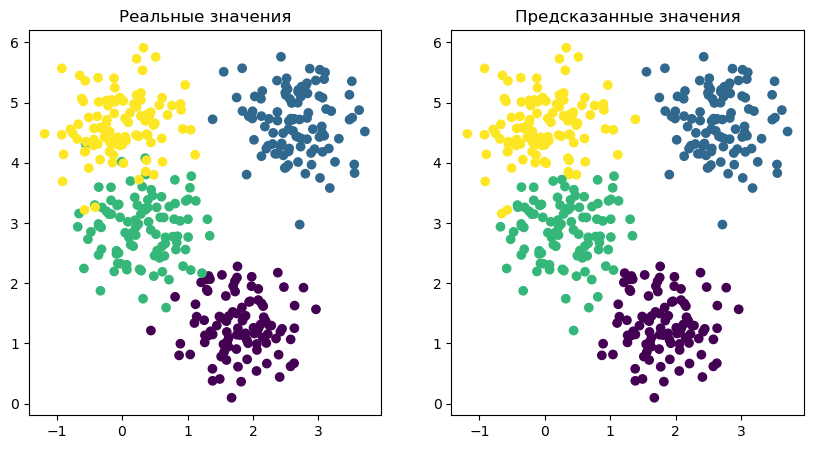

In [78]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title('Реальные значения')
ax1.scatter(data['x1'], data['x2'], c=data['class'])
ax2.set_title('Предсказанные значения')
ax2.scatter(data['x1'], data['x2'], c=data['predict_class'])

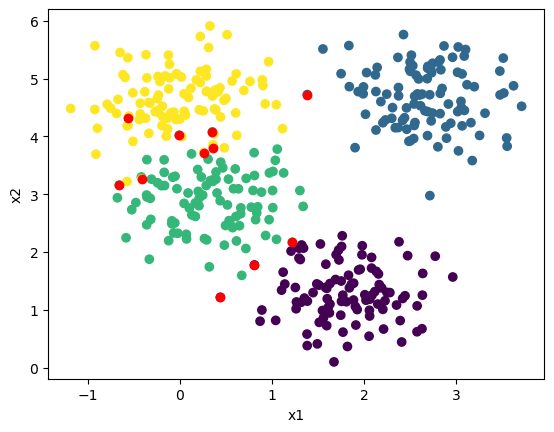

In [79]:
data_error = data[data['class'] != data['predict_class']]
plt.scatter(data['x1'], data['x2'], c=data['class'])
plt.scatter(data_error['x1'], data_error['x2'], c='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [80]:
data_error

,x1,x2,class,predict_class
20,0.440600,1.215274,0,2
58,0.810381,1.775498,0,2
144,1.384034,4.724147,1,3
202,-0.005851,4.019501,2,3
216,0.365410,3.807729,2,3
225,0.354475,4.079697,2,3
237,-0.556595,4.321164,2,3
257,-0.657545,3.158512,2,3
279,1.220707,2.169001,2,0
336,-0.411065,3.264354,3,2


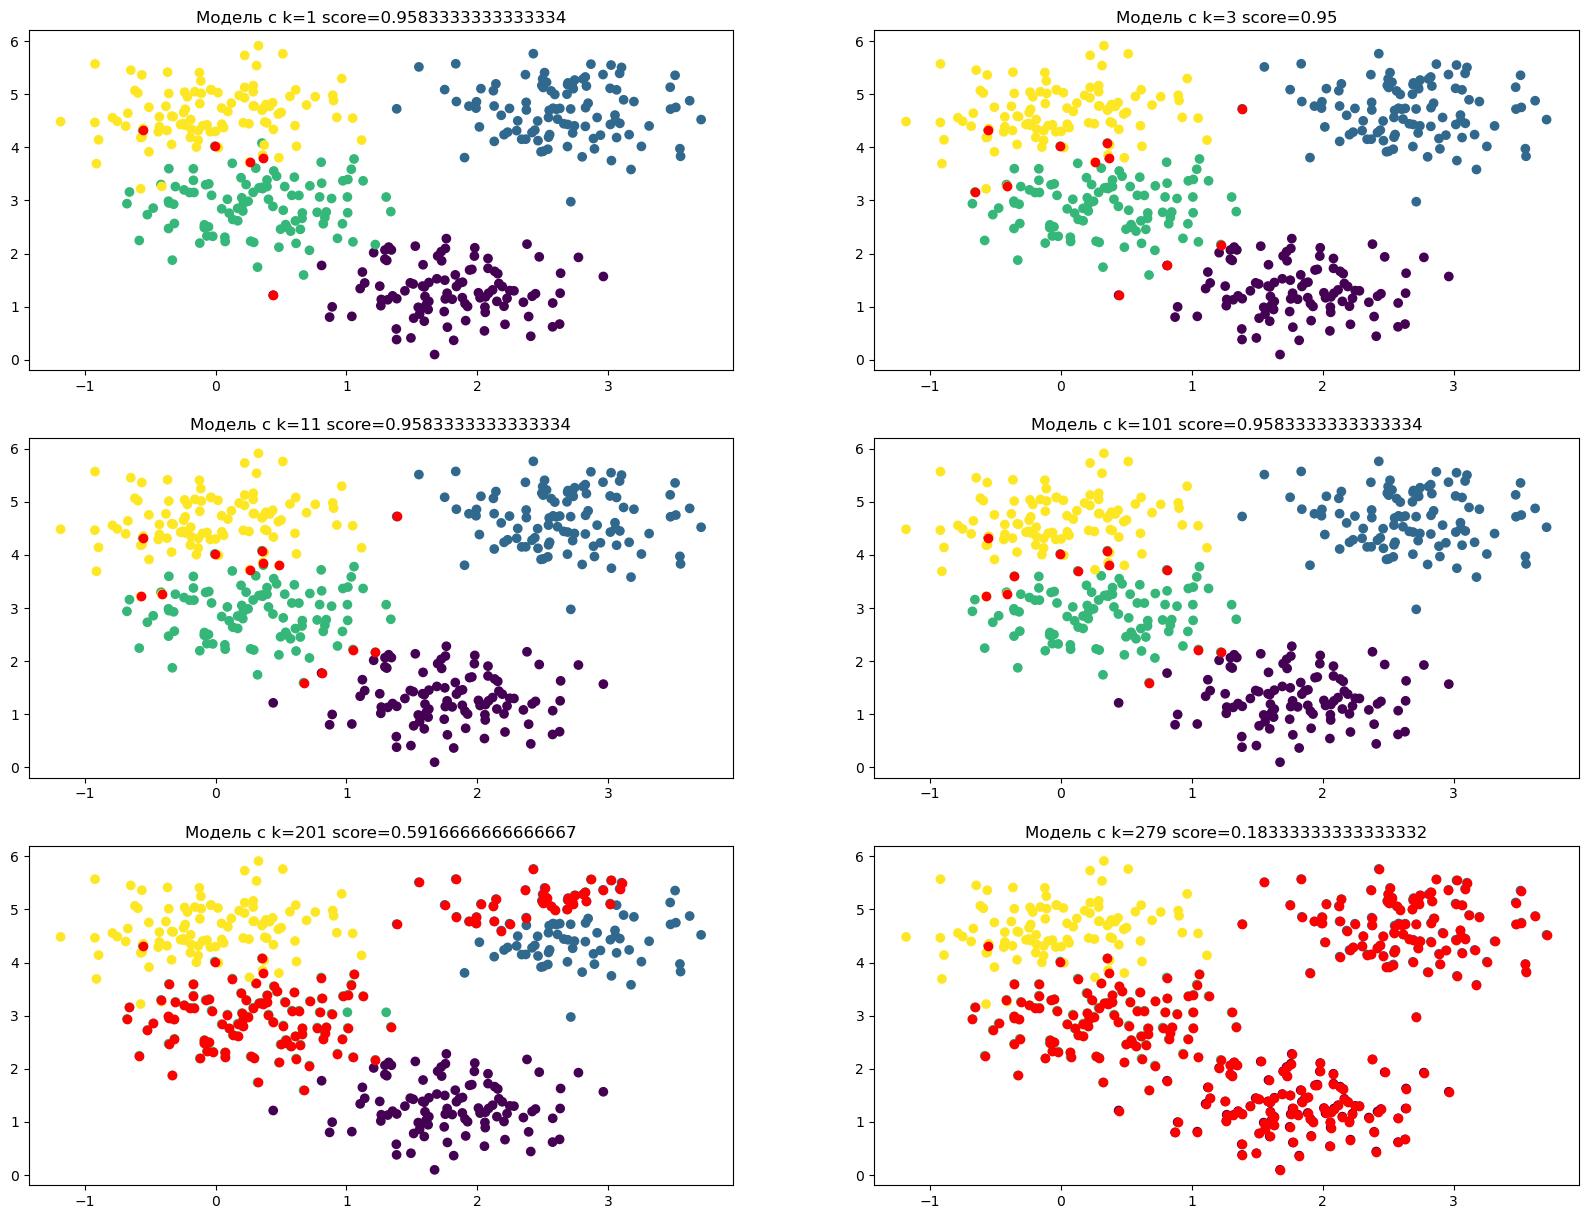

In [81]:
f, ax = plt.subplots(3, 2, figsize=(20,15))

k_list = [1, 3, 11, 101, 201, 279]
i = 0
j = 0
k_index = 0

for i in range(len(ax)):
    for j in range(len(ax[i])):

        k = k_list[k_index]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        data['predict_class'] = knn.predict(data[['x1', 'x2']])

        data_error = data[data['class'] != data['predict_class']]
        ax[i][j].set_title(f'Модель с k={k} score={knn.score(X_test, y_test)}')
        ax[i][j].scatter(data['x1'], data['x2'], c=data['class'])
        ax[i][j].scatter(data_error['x1'], data_error['x2'], c='red')
        k_index += 1

In [104]:
score_list = []
for k in range(1, 200, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    score_train = knn.score(X_train, y_train)
    score_test = knn.score(X_test, y_test)

    score_list.append([k, score_train, score_test])

In [105]:
score_df = pd.DataFrame(score_list, columns= ['k', 'score_train', 'score_test'])

In [106]:
score_df.head()

,k,score_train,score_test
0,1,1.000000,0.958333
1,3,0.982143,0.950000
2,5,0.982143,0.950000
3,7,0.982143,0.958333
4,9,0.975000,0.958333


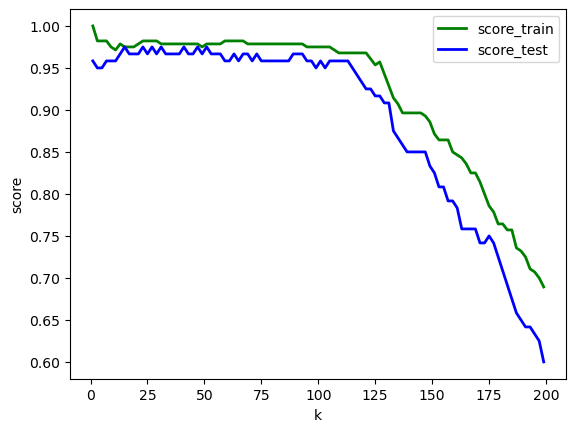

In [85]:
plt.plot(score_df['k'], score_df['score_train'], linewidth = 2, color='g', label='score_train')
plt.plot(score_df['k'], score_df['score_test'], linewidth = 2, color='b', label='score_test')

plt.xlabel('k')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

In [107]:
score_df[score_df['score_test'] == max(score_df['score_test'])]

,k,score_train,score_test
7,15,0.975000,0.975
11,23,0.982143,0.975
13,27,0.982143,0.975
15,31,0.978571,0.975
20,41,0.978571,0.975
23,47,0.978571,0.975
25,51,0.978571,0.975


In [109]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [110]:
model_knn = KNeighborsClassifier(n_neighbors=23)

In [111]:
loo = LeaveOneOut()

In [112]:
scores = cross_val_score(model_knn, X_train, y_train,
                         scoring='accuracy',
                         cv=loo, n_jobs=-1)

In [113]:
scores

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0.

In [114]:
len(scores)

280

In [115]:
scores.mean()

0.9785714285714285

In [116]:
score_list = []
for k in range(11, 41, 2):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model_knn, X_train, y_train,
                         scoring='accuracy',
                         cv=loo, n_jobs=-1)
    score_list.append([k, scores.mean()])

In [117]:
score_df = pd.DataFrame(score_list, columns=['k', 'score'])

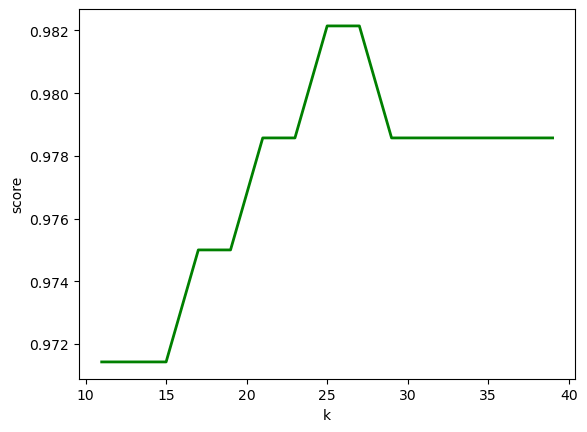

In [118]:
plt.plot(score_df['k'], score_df['score'], linewidth=2, color='g')
plt.xlabel('k')
plt.ylabel('score')
plt.show()

In [119]:
score_df[score_df['score'] == score_df['score'].max()]

,k,score
7,25,0.982143
8,27,0.982143


In [120]:
%%time
knn = KNeighborsClassifier(n_neighbors=25, algorithm='brute')
knn.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 7 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=25)

In [121]:
score_train = knn.score(X_train, y_train)
score_test = knn.score(X_test, y_test)

print(score_train)
print(score_test)

0.9821428571428571
0.9666666666666667


In [122]:
%%time
knn = KNeighborsClassifier(n_neighbors=25, algorithm='kd_tree')
knn.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 4 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=25)

In [123]:
score_train = knn.score(X_train, y_train)
score_test = knn.score(X_test, y_test)

print(score_train)
print(score_test)

0.9821428571428571
0.9666666666666667


In [124]:
%%time
knn = KNeighborsClassifier(n_neighbors=25, algorithm='ball_tree')
knn.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 4 ms


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=25)

In [125]:
score_train = knn.score(X_train, y_train)
score_test = knn.score(X_test, y_test)

print(score_train)
print(score_test)

0.9821428571428571
0.9666666666666667
